In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))
from scripts.utils import *
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from model.CNN import CNN_Model

2023-06-27 14:53:42.429157: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-27 14:53:50.419807: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-06-27 14:53:50.420518: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-06-27 14:53:50.420612: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

#### Using weights

In [3]:
# Init hyperparameters
epoch= 30
batch_size= 128
input_shape= (128, 128, 3)
using_class_weight= False
num_classes= 5

In [3]:
model= CNN_Model(input_shape= input_shape, num_classes= num_classes)

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1_1 (Conv2D)            (None, 128, 128, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 128, 128, 64)      36928     
                                                                 
 bn1 (BatchNormalization)    (None, 128, 128, 64)      256       
                                                                 
 maxpool1 (MaxPooling2D)     (None, 64, 64, 64)        0         
                                                                 
 conv2_1 (Conv2D)            (None, 64, 64, 128)       73856     
                                                                 
 conv2_2 (Conv2D)            (None, 64, 64, 128)       147584    
                                                                 
 bn2 (BatchNormalization)    (None, 64, 64, 128)       5

In [4]:
# load data
train_data, test_data= get_data('/media/data3/users/longnd/ML_prj/Data', input_shape, batch_size)
model= CNN_Model(input_shape= input_shape, num_classes= num_classes)
model_path = "/media/data3/users/longnd/ML_prj/checkpoints/cnn.h5"
checkpoint = ModelCheckpoint(filepath= model_path,
                            save_weights_only= True,
                            monitor= 'val_accuracy',
                            save_best_only= True, verbose=1)

earlystop = EarlyStopping(monitor= 'val_accuracy', 
                          min_delta= 0.01, 
                          patience= 15,
                          verbose= 1,
                          restore_best_weights= True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.00000001)
model_compiling(model)

Found 10639 validated image filenames belonging to 5 classes.
Found 2662 validated image filenames belonging to 5 classes.


In [6]:
# model.load_weights(model_path)

In [7]:
classes= get_classes()

In [36]:
df= pd.DataFrame(train_data.labels).value_counts()#.plot(kind='bar')

In [37]:
ex= {i: classes[i] for i in range(len(classes))}

In [38]:
mn= {ex[i]:df[i] for i in ex}

In [39]:
mn

{'COVID19': 460,
 'NORMAL1': 4066,
 'PNEUMONIA': 3418,
 'TUBERCULOSIS': 560,
 'PNEUMOTHORAX': 2135}

In [21]:
df.columns = [classs for i, classs in enumerate(classes)]


In [22]:
df.value_counts()

count
1017    1
855     1
534     1
140     1
116     1
Name: count, dtype: int64

In [20]:
df.rename(columns={i: classs for i, classs in enumerate(classes)}, inplace= True)

TypeError: Series.rename() got an unexpected keyword argument 'columns'

In [7]:
pd.DataFrame(train_data.classes).value_counts()

1    4066
2    3418
4    2135
3     560
0     460
Name: count, dtype: int64

In [8]:
# train model
class_weight= get_balanced_weight(train_data)
if using_class_weight:
    history = model.fit(
        train_data, 
        validation_data= test_data, 
        epochs=epoch, 
        class_weight=class_weight,
        callbacks=[earlystop, checkpoint, learning_rate_reduction])
else:
    history = model.fit(
        train_data, 
        validation_data= test_data, 
        epochs=epoch, 
        callbacks=[earlystop, checkpoint, learning_rate_reduction])

Epoch 1/30


2023-06-25 17:32:35.793279: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 6.06GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-06-25 17:32:35.793304: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 6.06GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


84/84 [==============================] - ETA: 0s - loss: 1.2715 - accuracy: 0.6774 - precision: 0.7486 - recall: 0.5933 - f1_score: 0.6619
Epoch 1: val_accuracy improved from -inf to 0.05259, saving model to /media/data3/users/longnd/ML_prj/checkpoints/cnn.h5
84/84 [==============================] - 117s 1s/step - loss: 1.2715 - accuracy: 0.6774 - precision: 0.7486 - recall: 0.5933 - f1_score: 0.6619 - val_loss: 7.6701 - val_accuracy: 0.0526 - val_precision: 0.0520 - val_recall: 0.0518 - val_f1_score: 0.0519 - lr: 0.0010
Epoch 2/30
84/84 [==============================] - ETA: 0s - loss: 0.9665 - accuracy: 0.7947 - precision: 0.8315 - recall: 0.7473 - f1_score: 0.7872
Epoch 2: val_accuracy improved from 0.05259 to 0.32682, saving model to /media/data3/users/longnd/ML_prj/checkpoints/cnn.h5
84/84 [==============================] - 102s 1s/step - loss: 0.9665 - accuracy: 0.7947 - precision: 0.8315 - recall: 0.7473 - f1_score: 0.7872 - val_loss: 4.1417 - val_accuracy: 0.3268 - val_precisi

In [9]:
parent_dir= '/media/data3/users/longnd/ML_prj/'
# save history
save_history_to_csv(history, os.path.join(parent_dir, 'history/cnn.csv'))

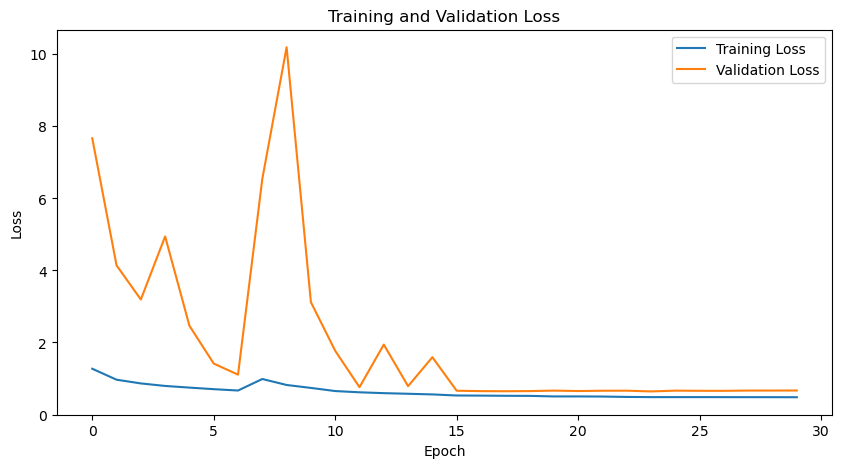

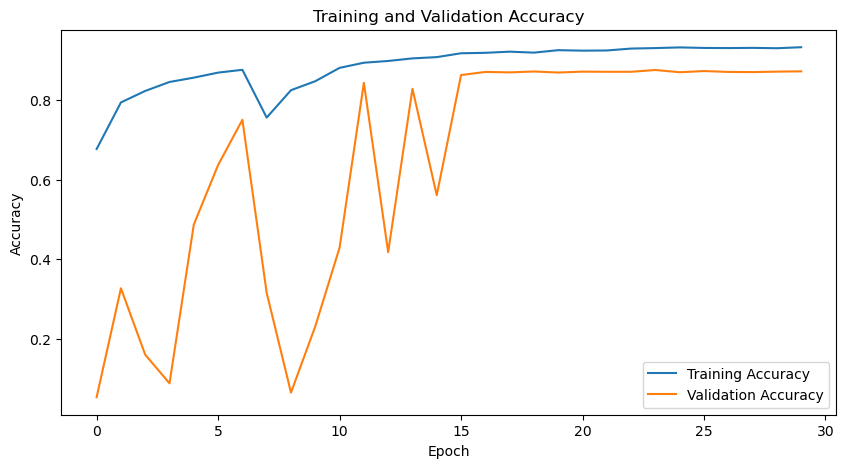

In [10]:
# plot history
plot_history(history)

In [11]:
# print result
# no weight
get_report(model, test_data)

21/21 [==============================] - 5s 205ms/step
              precision    recall  f1-score   support

     COVID19       0.87      0.66      0.75       116
     NORMAL1       0.81      0.93      0.86      1017
   PNEUMONIA       0.97      0.96      0.96       855
TUBERCULOSIS       0.95      0.94      0.94       140
PNEUMOTHORAX       0.85      0.65      0.74       534

    accuracy                           0.87      2662
   macro avg       0.89      0.83      0.85      2662
weighted avg       0.88      0.87      0.87      2662



: 

In [25]:
model.evaluate(test_data)

21/21 [==============================] - 16s 751ms/step - loss: 0.5980 - accuracy: 0.8685 - precision: 0.8836 - recall: 0.8610 - f1_score: 0.8721


[0.5979902744293213,
 0.8685199022293091,
 0.8835774660110474,
 0.8610067367553711,
 0.8721460700035095]

In [8]:
# weight
get_report(model, test_data)

21/21 [==============================] - 5s 206ms/step
              precision    recall  f1-score   support

     COVID19       0.74      0.83      0.78       116
     NORMAL1       0.85      0.87      0.86      1017
   PNEUMONIA       0.97      0.96      0.96       855
TUBERCULOSIS       0.98      0.98      0.98       140
PNEUMOTHORAX       0.79      0.74      0.76       534

    accuracy                           0.88      2662
   macro avg       0.86      0.88      0.87      2662
weighted avg       0.88      0.88      0.88      2662



: 

#### Using GAN